## 问题
有哪些因素会让船上的人生还率更高？

猜测：
- 性别
- 年龄
- 乘客等级



## 加载数据

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
titanic_df=pd.read_csv('titanic_data.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


列名分别为
- PassengerId: 乘客id
- Survived: 是否生还
- Pclass: 客舱等级
- Name: 乘客名
- Sex: 性别
- Age: 年龄
- SibSp: 堂兄弟数
- Parch: 父母与小孩个数
- Ticket: 票号
- Fare: 票价
- Cabin: 客舱
- Embarked: 登船港口

查看该性数据

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BEBD710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C7A9208>]], dtype=object)

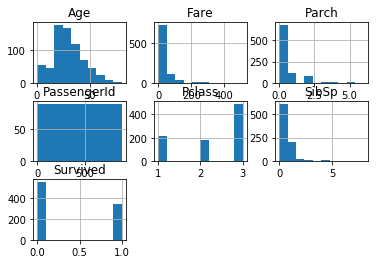

In [4]:
titanic_df.info()
titanic_df.hist()

年龄存在177 个缺失值，客舱存在687个缺失值，登船港口存在2个缺失值

## 整理数据

### 处理缺失值
可看到年龄存在177 个缺失值，客舱存在687个缺失值，登船港口存在2个缺失值

对年龄和客舱的缺失值进行补-1，在两列中，-1均代表未知

In [5]:
titanic_nonull=titanic_df.fillna(-1)
titanic_nonull.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,-1,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,-1,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,-1,S


### 过滤数据
推测生还率与性别、年龄、乘客登记有关
数据集中保留以上三者

In [6]:
titanic_focus=titanic_nonull[['Pclass','Sex','Age','Survived']]
titanic_focus.head()

,Pclass,Sex,Age,Survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0


## 探索与分析
对以上推测的因素进行分析

### 客舱等级

        Total  Survived  Survived_ratio  Unsurvived
Pclass                                             
1         216       136        0.629630          80
2         184        87        0.472826          97
3         491       119        0.242363         372


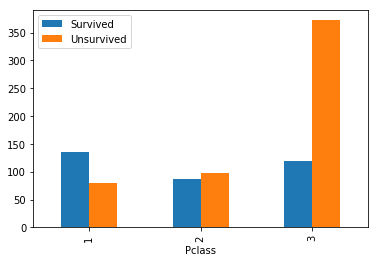

In [7]:
titanic_pclass=titanic_focus[['Pclass','Survived']]
#按客户等级分组
groupby_pclass = titanic_pclass.groupby('Pclass')
#各等级人数
total_groupby_pclass = groupby_pclass.count().rename(columns={'Survived':'Total'})
#各等级的生还数
survived_groupby_pclass = groupby_pclass.sum()


pclass_df=total_groupby_pclass.merge(survived_groupby_pclass,left_index=True,right_index=True)
pclass_df['Survived_ratio']=pclass_df['Survived']/pclass_df['Total']
pclass_df['Unsurvived']=pclass_df['Total']-pclass_df['Survived']
print pclass_df

#各等级生还和非生还人数
pclass_df[['Survived','Unsurvived']].plot(kind='bar')
# pclass_df['Survived'].plot(kind='bar')


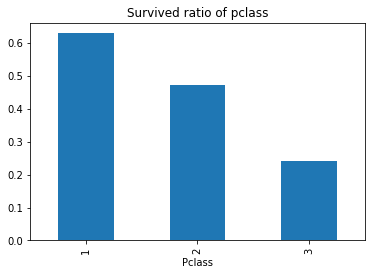

In [8]:
#各等级生还率
pclass_df['Survived_ratio'].plot(kind='bar',title='Survived ratio of pclass')

从上图得知：
pclass=1>pclass=2>pclass=3,
等级越高，生还率越高

### 性别

        Total  Survived  Survived_ratio  Unsurvived
Sex                                                
female    314       233        0.742038          81
male      577       109        0.188908         468


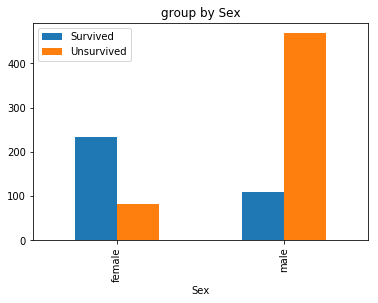

In [12]:
titanic_sex=titanic_focus[['Sex','Survived']]
#按性别分组
groupby_sex = titanic_sex.groupby('Sex')
#各性别人数
total_groupby_sex = groupby_sex.count().rename(columns={'Survived':'Total'})
#各性别的生还数
survived_groupby_sex = groupby_sex.sum()


sex_df=total_groupby_sex.merge(survived_groupby_sex,left_index=True,right_index=True)
sex_df['Survived_ratio']=sex_df['Survived']/sex_df['Total']
sex_df['Unsurvived']=sex_df['Total']-sex_df['Survived']
print sex_df

#各性别生还和非生还人数
sex_df[['Survived','Unsurvived']].plot(kind='bar',title='group by Sex')


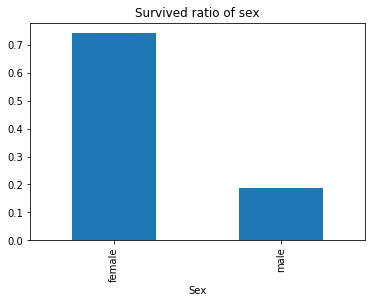

In [13]:
#性别生还率
sex_df['Survived_ratio'].plot(kind='bar',title='Survived ratio of sex')

从上两图可看到，女性总人数比男性少，但是生还数却比男性高；

另外，从生还率来看，女星的生还率0.74>男性的0.19，所以可以得知性别也是影响生还率的重要因素。

### 年龄

In [14]:
titanic_age=titanic_focus[['Age','Survived']]
titanic_age[titanic_age['Age']<0]['Age'].count()

177

年龄缺失数量为177

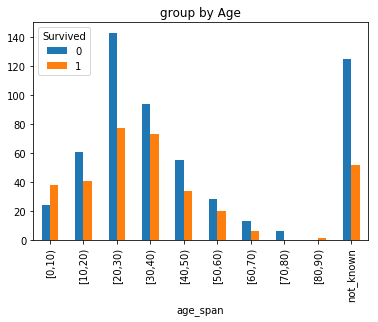

In [26]:
new_titanic_age=titanic_age
bin_size=10
#分桶函数
def time_span(x): 
    if x>-1 : 
        return '[%d,%d)' % (int(x/bin_size)*bin_size,(int(x/bin_size)+1)*bin_size) 
    else: 
        return 'not_known'
new_titanic_age2=new_titanic_age.merge(pd.DataFrame(new_titanic_age['Age'].map(time_span)).rename(columns={'Age':'age_span'}), left_index=True, right_index=True)
#各年龄分段的生还率
age_group=new_titanic_age2.groupby(['age_span','Survived'])
age_bin=age_group.count()
new_age_bin=age_bin.unstack()['Age'].reset_index()
# new_age_bin.drop('Survived')
new_age_bin.plot(kind='bar',x='age_span',title='group by Age')

将年龄层分段，生成新的dataframe

In [21]:
new_age_bin=age_bin.unstack()['Age']
new_age_bin.columns=[new_age_bin.columns.name+"_"+str(x) for x in new_age_bin.columns.values]
new_age_bin=new_age_bin.fillna(0)
new_age_bin

,Survived_0,Survived_1
age_span,,
"[0,10)",24.0,38.0
"[10,20)",61.0,41.0
"[20,30)",143.0,77.0
"[30,40)",94.0,73.0
"[40,50)",55.0,34.0
"[50,60)",28.0,20.0
"[60,70)",13.0,6.0
"[70,80)",6.0,0.0
"[80,90)",0.0,1.0


 新建“生还率”一列

In [22]:
new_age_bin['survived_rate']=new_age_bin['Survived_1']/(new_age_bin['Survived_0']+new_age_bin['Survived_1'])
new_age_bin

,Survived_0,Survived_1,survived_rate
age_span,,,
"[0,10)",24.0,38.0,0.612903
"[10,20)",61.0,41.0,0.401961
"[20,30)",143.0,77.0,0.350000
"[30,40)",94.0,73.0,0.437126
"[40,50)",55.0,34.0,0.382022
"[50,60)",28.0,20.0,0.416667
"[60,70)",13.0,6.0,0.315789
"[70,80)",6.0,0.0,0.000000
"[80,90)",0.0,1.0,1.000000


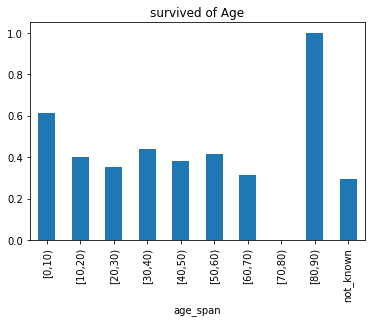

In [24]:
new_age_bin['survived_rate'].plot(kind='bar',title='survived of Age')

从各年龄段的生存率看，[0-10)的生存几率最大（超过50%）。

[80-90)仅有一人，且生还，故而其生还率达100%，属于特例。

其它年龄段没有特别明显的差异，均小于50%。

最低的是老龄人[60-70)，生还率仅有31.58%。

另外有177人缺失年龄数据。

## 结论

从以上分析可知道：

1、客舱等级和性别是影响生还的重要因素；

2、从年龄维度来看，0-10岁的人的生还率是最高，60岁以上的生还率低；